# The Problem
Heart Disease
Heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease; heart rhythm problems (arrhythmias); and heart defects you're born with (congenital heart defects), among others.
While cardiovascular disease can refer to different heart or blood vessel problems, the term is often used to mean damage to your heart or blood vessels by atherosclerosis (ath-ur-o-skluh-ROE-sis), a buildup of fatty plaques in your arteries. Plaque buildup thickens and stiffens artery walls, which can inhibit blood flow through your arteries to your organs and tissues.
Atherosclerosis is also the most common cause of cardiovascular disease. It can be caused by correctable problems, such as an unhealthy diet, lack of exercise, being overweight and smoking.

# Diagnosis
The diagnosis of heart disease is done on a combination of clinical signs and test results. The types of tests run will be chosen on the basis of what the physician thinks is going on, ranging from electrocardiograms and cardiac computerized tomography (CT) scans, to blood tests and exercise stress tests.

# Dataset
The original database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

Why was it important to understand what heart disease is and its diagnosis processes? after all we don't perform the surgery.


A bit of background research is important to solve any machine learning problem. When we have the knowledge of what factors contribute to the presense of heart disease, we know what to look for. If the necessary information isn't available we can either extract it from other features or get back to data collection. Absense of this backgroud may lead to building flimsy models.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
import statsmodels as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import r2_score,accuracy_score
import eli5
from eli5.sklearn import PermutationImportance
#import shap
from pdpbox import pdp, info_plots

c:\users\mohit ranawat\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\users\mohit ranawat\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv(r"F:\Datasets\end_to_end_data_sets\end to end data sets\heart.csv")
df.shape

(303, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Description
1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type (4 values) 
    -- Value 0: typical angina
    -- Value 1: atypical angina
    -- Value 2: non-anginal pain
    -- Value 3: asymptomatic
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
5. chol - serum cholestoral in mg/dl 
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. restecg - resting electrocardiographic results 
    -- Value 0: normal
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
11. slope - the slope of the peak exercise ST segment 
    -- Value 0: upsloping
    -- Value 1: flat
    -- Value 2: downsloping
12. ca - number of major vessels (0-3) colored by flourosopy 
13. thal 
    -- Value 0: unknown
    -- Value 1: fixed defect
    -- Value 2: normal
    -- Value 3: reversable defect 
14. target - have disease or not (1=yes, 0=no)

In [4]:
df_org = df.copy(deep=True)

In [5]:
df['sex'].replace({1:'male',0:'female'},inplace=True)
df['cp'].replace({0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'},inplace=True)
df['restecg'].replace({0:'normal',1:'ST wave abnormality',2:'ventricular hypertrophy'},inplace=True)
df['slope'].replace({0:'upsloping',1:'flat',2:'downsloping'},inplace=True)
df['thal'].replace({0:'unknown',1:'fixed defect',2:'normal',3:'reversable defect'},inplace=True)

In [6]:
for col in ['sex','cp','restecg','slope','thal']:
    print(col)
    print(df[col].value_counts())
    print()

sex
male      207
female     96
Name: sex, dtype: int64

cp
typical angina      143
non-anginal pain     87
atypical angina      50
asymptomatic         23
Name: cp, dtype: int64

restecg
ST wave abnormality        152
normal                     147
ventricular hypertrophy      4
Name: restecg, dtype: int64

slope
downsloping    142
flat           140
upsloping       21
Name: slope, dtype: int64

thal
normal               166
reversable defect    117
fixed defect          18
unknown                2
Name: thal, dtype: int64



In [7]:
df.describe()

,age,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,0.148515,149.646865,0.326733,1.039604,0.729373,0.544554
std,9.082101,17.538143,51.830751,0.356198,22.905161,0.469794,1.161075,1.022606,0.498835
min,29.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,0.000000,153.000000,0.000000,0.800000,0.000000,1.000000
75%,61.000000,140.000000,274.500000,0.000000,166.000000,1.000000,1.600000,1.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,4.000000,1.000000


In [8]:
df.describe(include='object')

,sex,cp,restecg,slope,thal
count,303,303,303,303,303
unique,2,4,3,3,4
top,male,typical angina,ST wave abnormality,downsloping,normal
freq,207,143,152,142,166


All variables can be interpreted as numeric but on different scales. So to perform predictive analytics it might be necessary to scale them. Since all have continous values binning them would make analysis far easier to interpret.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 33.3+ KB


There aren't any null values. Still let's check the number of null values by column

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

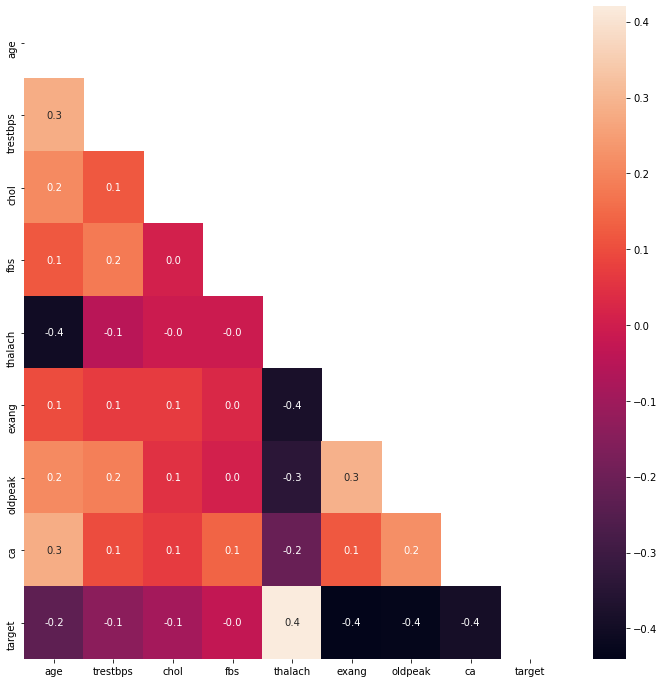

In [11]:
plt.figure(figsize=(12,12))
corr=round(df.corr(),2)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
#print(corr)
sns.heatmap(corr,annot=True,fmt='.1f',mask=mask)
plt.show()

# Age Analysis

In [12]:
df.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

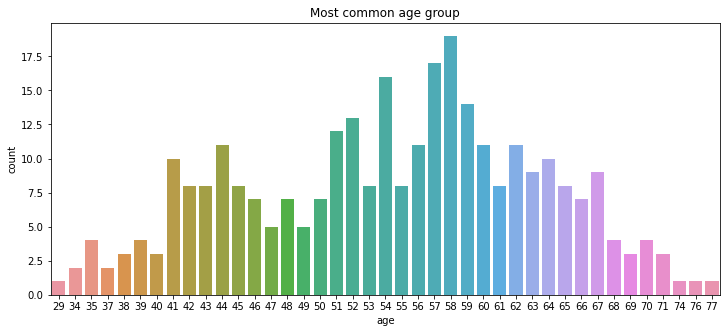

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(df['age'])
plt.title('Most common age group')
plt.show()

The most common age group in the study was 57. People in the study have age between 29 and 77

In [14]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

As per our study of 303 participants 165 of them have a heart disease and 138 don't. That makes up around 54% with disease

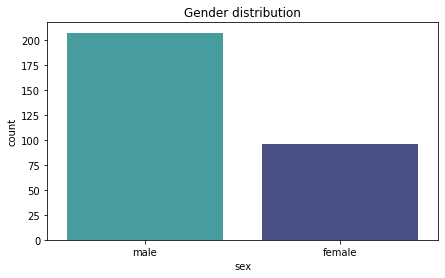

In [15]:
plt.figure(figsize=(7,4))
sns.countplot(x='sex', data=df, palette="mako_r")
plt.title('Gender distribution')
plt.show()


Let's now do the binning we've earlier discussed

In [16]:
young_ages=df[(df.age>=29)&(df.age<40)]
middle_ages=df[(df.age>=40)&(df.age<55)]
elderly_ages=df[(df.age>55)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))

Young Ages : 16
Middle Ages : 128
Elderly Ages : 151


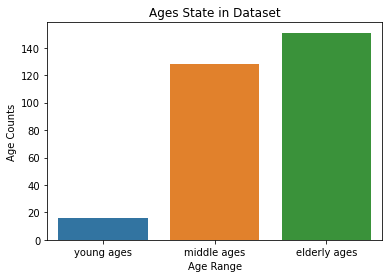

In [17]:
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.title('Ages State in Dataset')
plt.show()

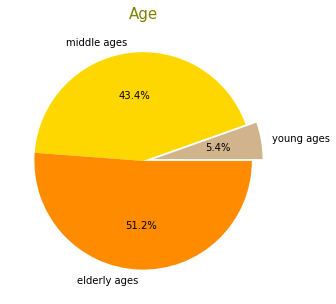

In [18]:
colors = ['tan','gold','darkorange']
explode = [0.1,0,0]
plt.figure(figsize = (5,5))
plt.pie([len(young_ages),len(middle_ages),len(elderly_ages)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.title('Age',color = 'olive',fontsize = 15)
plt.show()

In [19]:
df.groupby('target').mean()

,age,trestbps,chol,fbs,thalach,exang,oldpeak,ca
target,,,,,,,,
0,56.601449,134.398551,251.086957,0.159420,139.101449,0.550725,1.585507,1.166667
1,52.496970,129.303030,242.230303,0.139394,158.466667,0.139394,0.583030,0.363636


In [20]:
df.groupby('target').std()

,age,trestbps,chol,fbs,thalach,exang,oldpeak,ca
target,,,,,,,,
0,7.962082,18.729944,49.454614,0.367401,22.598782,0.499232,1.300340,1.043460
1,9.550651,16.169613,53.552872,0.347412,19.174276,0.347412,0.780683,0.848894


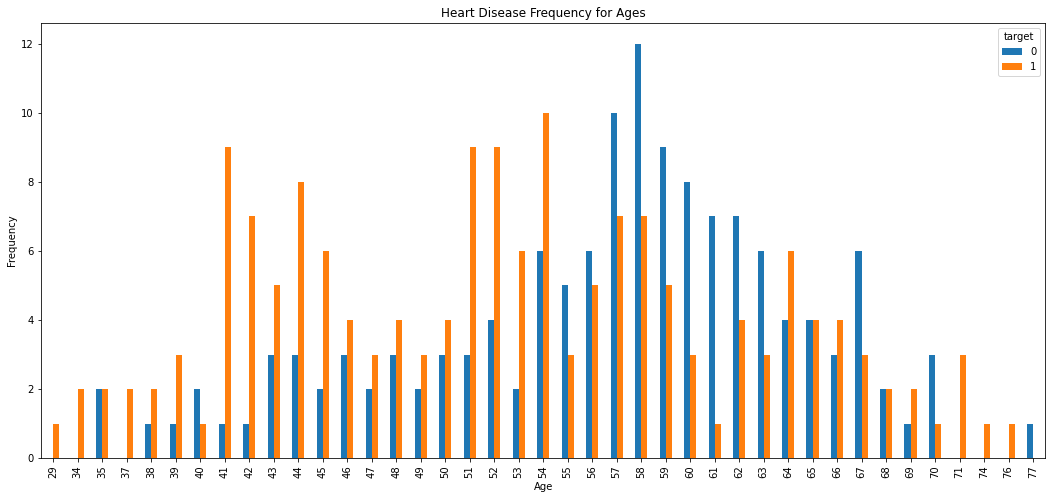

In [21]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(18,8))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

From age 29 to 77 we can see from the graph that

    1. 54 to 67 aged people are not having heart disease with 8 as of average frequency 
    2. The frequency of having heart disease is increasing from 29 to 53.

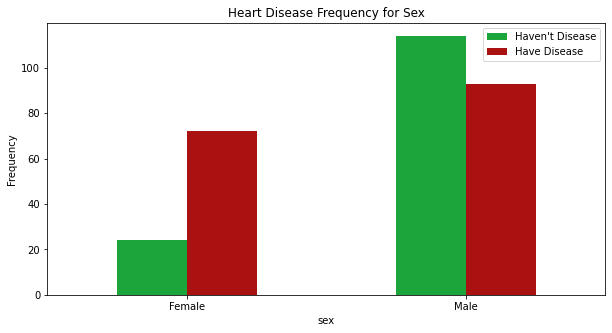

In [22]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(10,5),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xticks(ticks=(0,1),labels=('Female', 'Male'))
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

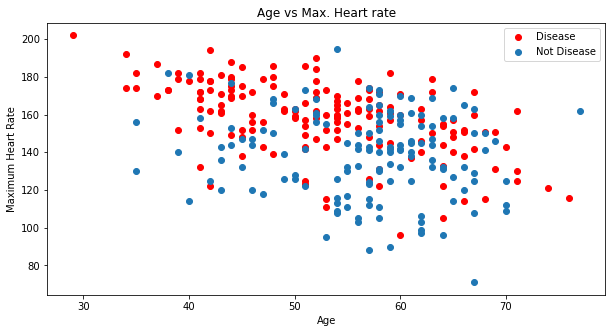

In [23]:
plt.figure(figsize=(10,5))
plt.title('Age vs Max. Heart rate')
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

The region towards top left is critical since the number of cases of disease are predominant there

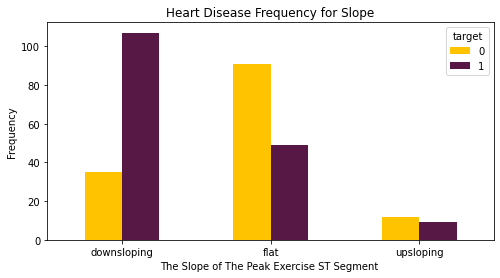

In [24]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(8,4),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

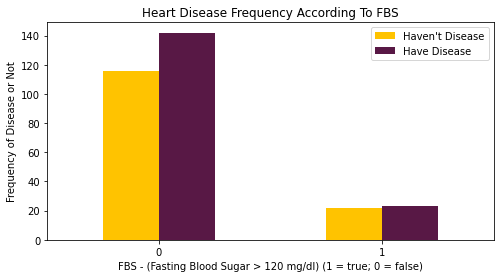

In [25]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(8,4),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [26]:
#chest pain field
df.cp.value_counts()

typical angina      143
non-anginal pain     87
atypical angina      50
asymptomatic         23
Name: cp, dtype: int64

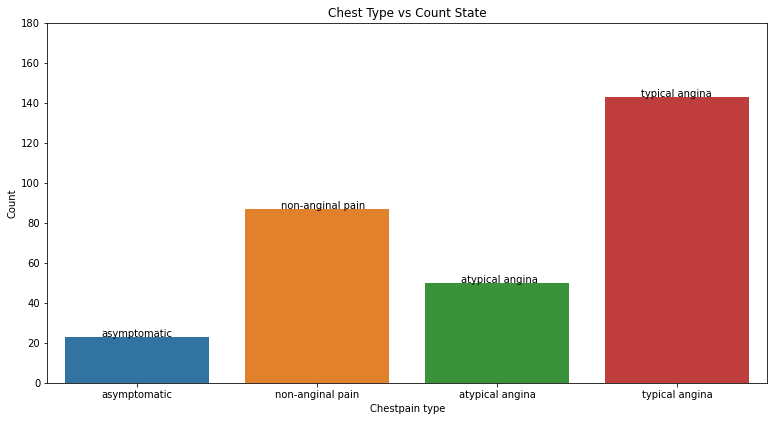

In [27]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes((1,1,1,1))
sns.countplot(df.cp,ax=ax)
plt.xlabel('Chestpain type')
plt.ylabel('Count')
plt.title('Chest Type vs Count State')
plt.ylim(0,180)


for p, label in zip(ax.patches, ['asymptomatic','non-anginal pain','atypical angina ','typical angina']):
    ax.annotate(label, (p.get_x()+0.20, p.get_height()+0.15))

<Figure size 576x288 with 0 Axes>

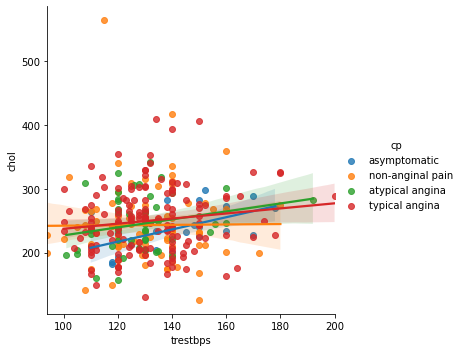

In [28]:
plt.figure(figsize=(8,4))
sns.lmplot(x="trestbps", y="chol",data=df,hue="cp")
plt.show()


In [29]:
df.thalach.value_counts()[:20]


162    11
160     9
163     9
173     8
152     8
125     7
132     7
150     7
172     7
143     7
144     7
156     6
169     6
158     6
140     6
142     6
178     5
161     5
154     5
165     5
Name: thalach, dtype: int64

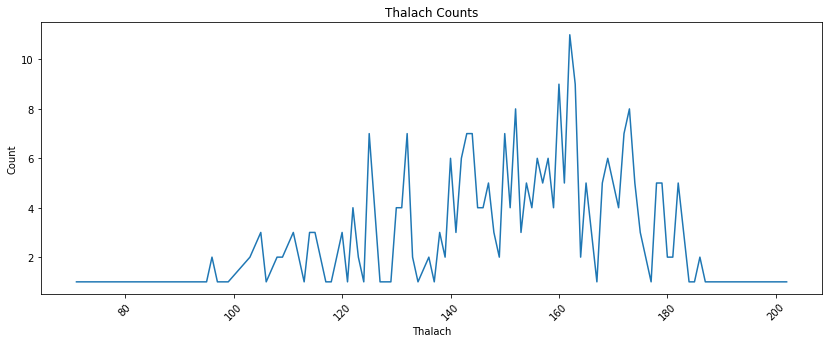

In [30]:
plt.figure(figsize=(14,5))
sns.lineplot(x=df.thalach.value_counts().index,y=df.thalach.value_counts().values)
plt.xlabel('Thalach')
plt.ylabel('Count')
plt.title('Thalach Counts')
plt.xticks(rotation=45)
plt.show()

In [31]:
age_unique=sorted(df.age.unique())
age_thalach_values=df.groupby('age')['thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(df[df['age']==age].thalach)/age_thalach_values[i])

The transactions we perform in this section mean an average age. In this part, taking the average of all transactions is performed.

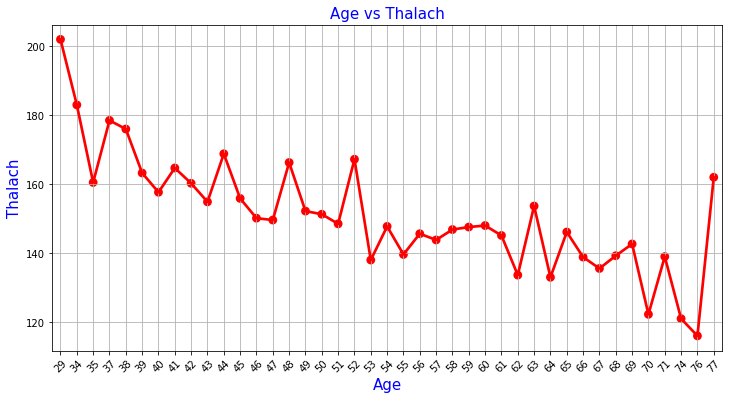

In [32]:
#data_sorted=data.sort_values(by='Age',ascending=True)
plt.figure(figsize=(12,6))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')
plt.grid()
plt.show()

In [33]:
cp_thalach=df.groupby('cp')['thalach'].mean()


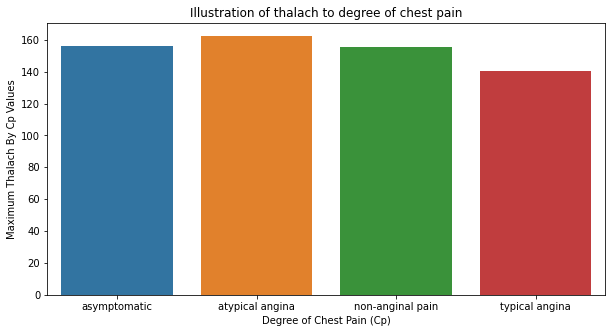

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(x=cp_thalach.index,y=cp_thalach.values)
plt.xlabel('Degree of Chest Pain (Cp)')
plt.ylabel('Maximum Thalach By Cp Values')
plt.title('Illustration of thalach to degree of chest pain')
plt.show()
#As seen in this graph, it is seen that the heart rate is less 
#when the chest pain is low. But in cases where chest pain is 
#1, it is observed that the area is more. 2 and 3 were found to 
#be of the same degree.

In [35]:
df.thal.value_counts()


normal               166
reversable defect    117
fixed defect          18
unknown                2
Name: thal, dtype: int64

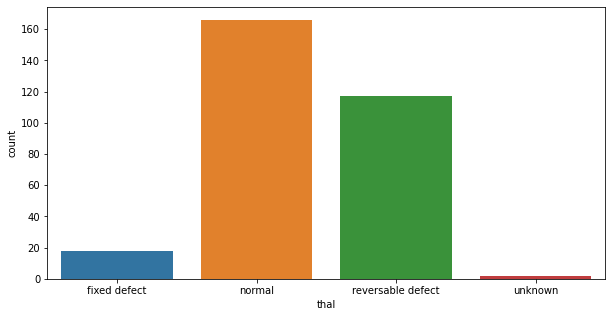

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(df.thal)
plt.show()

According to the analysis, Thal values are observed. Of these values, 0 is only 2. 1 showed a distribution of 18. In order to better understand this distribution, we need to take a look at the data set.

In [37]:
df[(df.thal=='unknown')]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,female,non-anginal pain,128,216,0,normal,115,0,0.0,downsloping,0,unknown,1
281,52,male,typical angina,128,204,1,ST wave abnormality,156,1,1.0,flat,0,unknown,0


In [38]:
df['thal'].value_counts()


normal               166
reversable defect    117
fixed defect          18
unknown                2
Name: thal, dtype: int64

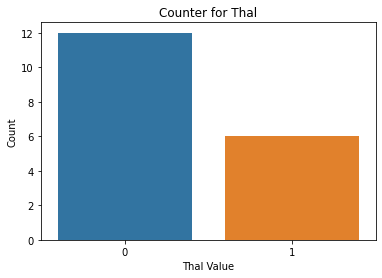

In [39]:
sns.barplot(x=df[(df['thal']=='fixed defect')].target.value_counts().index,y=df[(df['thal']=='fixed defect')].target.value_counts().values)
plt.xlabel('Thal Value')
plt.ylabel('Count')
plt.title('Counter for Thal')
plt.show()

In [40]:
#Target 1
a=len(df[(df['target']==1)&(df['thal']=='unknown')])
b=len(df[(df['target']==1)&(df['thal']=='fixed defect')])
c=len(df[(df['target']==1)&(df['thal']=='normal')])
d=len(df[(df['target']==1)&(df['thal']=='reversable defect')])
print('Target 1 Thal 0: ',a)
print('Target 1 Thal 1: ',b)
print('Target 1 Thal 2: ',c)
print('Target 1 Thal 3: ',d)


print('*'*50)
#Target 0
e=len(df[(df['target']==0)&(df['thal']=='unknown')])
f=len(df[(df['target']==0)&(df['thal']=='fixed defect')])
g=len(df[(df['target']==0)&(df['thal']=='normal')])
h=len(df[(df['target']==0)&(df['thal']=='reversable defect')])
print('Target 0 Thal 0: ',e)
print('Target 0 Thal 1: ',f)
print('Target 0 Thal 2: ',g)
print('Target 0 Thal 3: ',h)

Target 1 Thal 0:  1
Target 1 Thal 1:  6
Target 1 Thal 2:  130
Target 1 Thal 3:  28
**************************************************
Target 0 Thal 0:  1
Target 0 Thal 1:  12
Target 0 Thal 2:  36
Target 0 Thal 3:  89


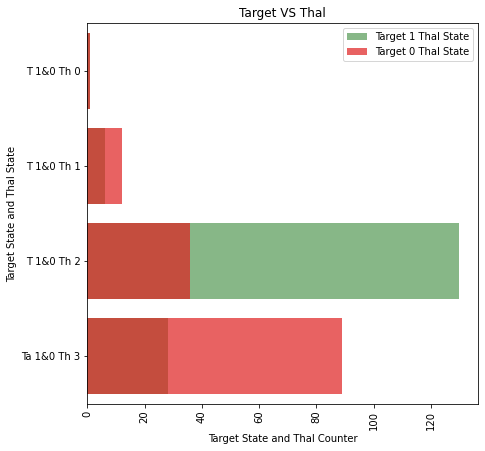

In [41]:
'''
thal 
        -- Value 0: unknown
        -- Value 1: fixed defect
        -- Value 2: normal
        -- Value 3: reversable defect 

'''

f,ax=plt.subplots(figsize=(7,7))
sns.barplot(y=['T 1&0 Th 0','T 1&0 Th 1','T 1&0 Th 2','Ta 1&0 Th 3'],x=[1,6,130,28],color='green',alpha=0.5,label='Target 1 Thal State')
sns.barplot(y=['T 1&0 Th 0','T 1&0 Th 1','T 1&0 Th 2','Ta 1&0 Th 3'],x=[1,12,36,89],color='red',alpha=0.7,label='Target 0 Thal State')
ax.legend(loc='upper right',frameon=True)
ax.set(xlabel='Target State and Thal Counter',ylabel='Target State and Thal State',title='Target VS Thal')
plt.xticks(rotation=90)
plt.show()
#so, there has been a very nice graphic display. This is the situation that best describes the situation.

In [42]:
df.target.unique()


array([1, 0], dtype=int64)

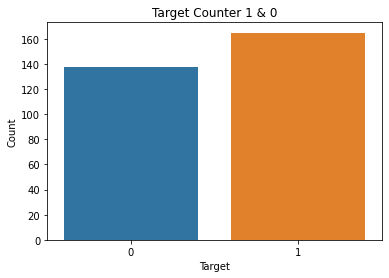

In [43]:
sns.countplot(df.target)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target Counter 1 & 0')
plt.show()

In [44]:
age_counter_target_1=[]
age_counter_target_0=[]
for age in df.age.unique():
    age_counter_target_1.append(len(df[(df['age']==age)&(df.target==1)]))
    age_counter_target_0.append(len(df[(df['age']==age)&(df.target==0)]))

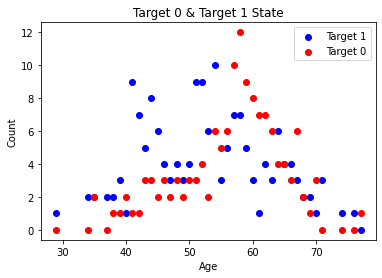

In [45]:
#Target 1 & 0 show graph on scatter
plt.scatter(x=df.age.unique(),y=age_counter_target_1,color='blue',label='Target 1')
plt.scatter(x=df.age.unique(),y=age_counter_target_0,color='red',label='Target 0')
plt.legend(loc='upper right',frameon=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Target 0 & Target 1 State')
plt.show()

It's a decent estimator, though there is an overlap there are areas where the ones with disease are more than the others

In [46]:
df.corr()


,age,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target
age,1.000000,0.279351,0.213678,0.121308,-0.398522,0.096801,0.210013,0.276326,-0.225439
trestbps,0.279351,1.000000,0.123174,0.177531,-0.046698,0.067616,0.193216,0.101389,-0.144931
chol,0.213678,0.123174,1.000000,0.013294,-0.009940,0.067023,0.053952,0.070511,-0.085239
fbs,0.121308,0.177531,0.013294,1.000000,-0.008567,0.025665,0.005747,0.137979,-0.028046
thalach,-0.398522,-0.046698,-0.009940,-0.008567,1.000000,-0.378812,-0.344187,-0.213177,0.421741
exang,0.096801,0.067616,0.067023,0.025665,-0.378812,1.000000,0.288223,0.115739,-0.436757
oldpeak,0.210013,0.193216,0.053952,0.005747,-0.344187,0.288223,1.000000,0.222682,-0.430696
ca,0.276326,0.101389,0.070511,0.137979,-0.213177,0.115739,0.222682,1.000000,-0.391724
target,-0.225439,-0.144931,-0.085239,-0.028046,0.421741,-0.436757,-0.430696,-0.391724,1.000000


In [47]:
df_copy = df.copy(deep=True)
df = df_org.copy(deep=True)

In [48]:
from statsmodels import regression
X=np.append(arr=np.ones((303,1)).astype(int),values=df,axis=1)

X_l=df.iloc[:,[0,1,2,3,4,5,6]].values
r=regression.linear_model.OLS(endog=df.iloc[:,-1:],exog=X_l).fit()
print(r.summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.639
Method:                 Least Squares   F-statistic:                              77.65
Date:                Sat, 26 Sep 2020   Prob (F-statistic):                    2.75e-63
Time:                        15:59:16   Log-Likelihood:                         -179.91
No. Observations:                 303   AIC:                                      373.8
Df Residuals:                     296   BIC:                                      399.8
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

We have shown the P-value. The purpose of this value is to see the integration values between our data. The scale methods that we will do for this situation will increase this situation even higher.

In [49]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [50]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values


In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)


In [52]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [53]:
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
print("Test Accuracy {:.2f}%".format(lr.score(x_test.T,y_test.T)*100))

Test Accuracy 83.61%


In [54]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors = 3)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(3, knn.score(x_test.T, y_test.T)*100))

3 NN Score: 86.89%


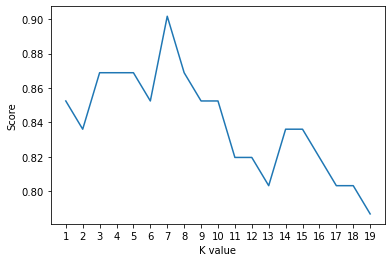

Maximum KNN Score is 90.16%


In [55]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

print("Maximum KNN Score is {:.2f}%".format((max(scoreList))*100))

The best number of neighbors is 7. so let's build a model with 7 neigbors

In [56]:
knn = KNeighborsClassifier(n_neighbors = 7)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(7, knn.score(x_test.T, y_test.T)*100))

7 NN Score: 90.16%


In [57]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(svm.score(x_test.T,y_test.T)*100))

Test Accuracy of SVM Algorithm: 83.61%


In [58]:
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)
print("Accuracy of Naive Bayes: {:.2f}%".format(nb.score(x_test.T,y_test.T)*100))

Accuracy of Naive Bayes: 85.25%


In [59]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc.score(x_test.T, y_test.T)*100))

Decision Tree Test Accuracy 77.05%


In [60]:
# Random Forest Classification
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(rf.score(x_test.T,y_test.T)*100))

Random Forest Algorithm Accuracy Score : 85.25%


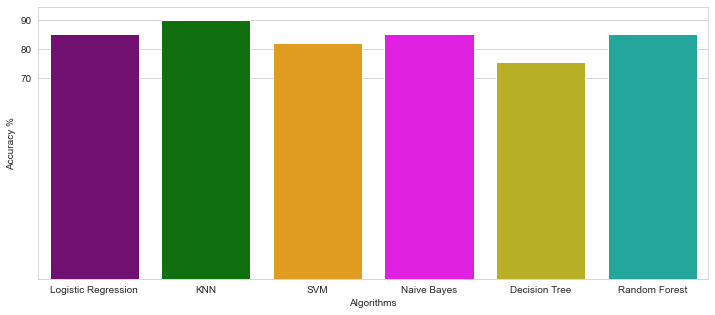

In [61]:
methods = ["Logistic Regression", "KNN", "SVM", "Naive Bayes", "Decision Tree", "Random Forest"]
accuracy = [85.25, 90.16, 81.97, 85.25, 75.41, 85.25]
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(12,5)) 
plt.yticks(np.arange(70,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.show()

The obvious response would be KNN with 7 neighbors. But we can surely improve the rest of the models and probably even get them to that scale with hyperparameter tuning. If we also use the cross_validation any overfit in the KNN would also be identified

In [62]:
y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 7)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)

In [63]:
cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)

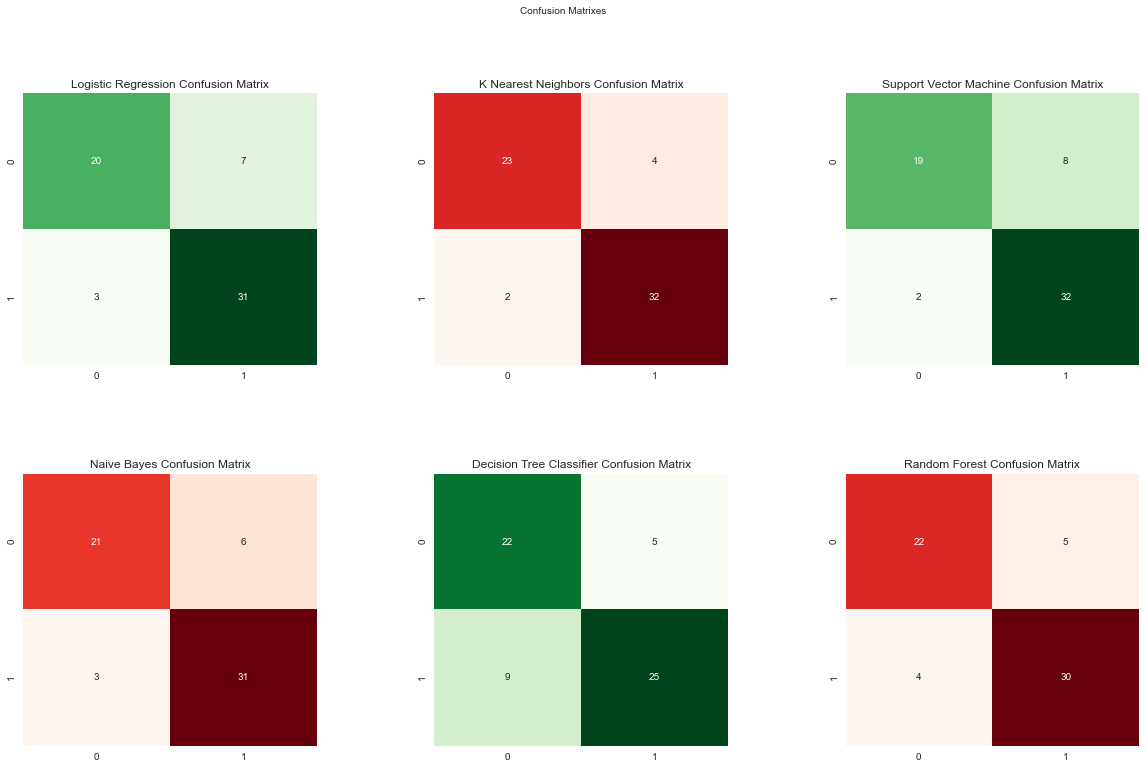

In [64]:
plt.figure(figsize=(20,12))

plt.suptitle("Confusion Matrixes",fontsize=10)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Greens",fmt="d",cbar=False)

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Reds",fmt="d",cbar=False)

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Greens",fmt="d",cbar=False)

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Reds",fmt="d",cbar=False)

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Greens",fmt="d",cbar=False)

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Reds",fmt="d",cbar=False)

plt.show()

In [65]:
X=np.append(arr=np.ones((303,1)).astype(int),values=df,axis=1)

X_l=df.iloc[:,[0,1,2,3,4,5,6]].values
r=sm.regression.linear_model.OLS(endog=df.iloc[:,-1:],exog=X_l).fit()
print(r.summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.639
Method:                 Least Squares   F-statistic:                              77.65
Date:                Sat, 26 Sep 2020   Prob (F-statistic):                    2.75e-63
Time:                        15:59:48   Log-Likelihood:                         -179.91
No. Observations:                 303   AIC:                                      373.8
Df Residuals:                     296   BIC:                                      399.8
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [66]:
dataX=df.drop('target',axis=1)
dataY=df['target']

In [67]:
X_train,X_test,y_train,y_test=train_test_split(dataX,dataY,test_size=0.2,random_state=42)

In [68]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)
#X_train (242, 13)

X_train (242, 13)
X_test (61, 13)
y_train (242,)
y_test (61,)


The difference in value between our data is too big. It increases both the volume and the results are very bad. To reduce this situation we need to use the StandardScaler function. A value of -1.1 will be obtained after using it.

In [69]:
#Normalization as the first process
# Normalize
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

The diagonal values we see in these correlation values are always 1.0. That doesn't mean much to us. But the minus value is a big problem for me, but the value of the transactions are more valuable for us.

Now it is time to implement PCA to the data set.

But, before that, I will investigate the explained variance ratio and resulting principal components:

In [70]:
pca=PCA().fit(X_train)
print(pca.explained_variance_ratio_)
print()
print(X_train.columns.values.tolist())
print(pca.components_)

[0.27173097 0.19243203 0.11711389 0.08507425 0.08130784 0.06387459
 0.05517117 0.03314911 0.03074089 0.02484146 0.01832923 0.01605866
 0.0101759 ]

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
[[ 5.76307904e-02  4.99360368e-01 -3.09161586e-01  5.19394916e-03
  -8.17751585e-03  6.54357159e-03 -2.65560676e-02 -1.65171166e-01
   7.21082161e-01  1.65855116e-01 -2.16193413e-01  1.10017440e-01
   1.31540078e-01]
 [ 1.01758630e-01 -8.46514586e-01 -2.38970937e-01  4.88191372e-02
   6.23763767e-02 -7.79433333e-02  2.34304667e-02 -1.23865911e-01
   4.02940147e-01  5.32800990e-02 -1.44254962e-01 -3.54206224e-02
  -2.11293208e-02]
 [ 1.47996225e-01 -7.21500492e-02  3.98091819e-01  1.37692024e-01
   2.98971997e-02  8.24074790e-01 -1.27963911e-01 -5.35482623e-02
   7.38648738e-02  1.01386177e-01 -2.65396746e-01  9.23100668e-02
  -3.90929591e-02]
 [ 1.62320708e-01  2.03806848e-02 -2.38305760e-01  1.10497897e-02
   9.88869452e-03 -1.7

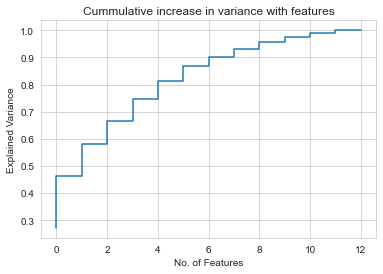

In [71]:
cumulative=np.cumsum(pca.explained_variance_ratio_)
plt.title('Cummulative increase in variance with features')
plt.step([i for i in range(len(cumulative))],cumulative)
plt.xlabel('No. of Features')
plt.ylabel('Explained Variance')
plt.show()

When you see the graph above, you can notice that after 8 components are added, the variance captured by data is almost as much as captured by all the features combined.
The reduced data can be seen on the plotting below.

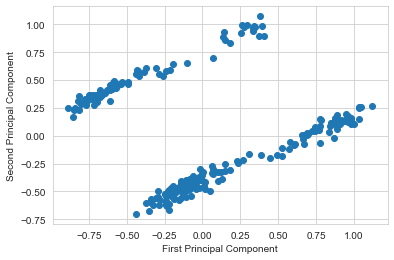

In [72]:
pca = PCA(n_components=8)
pca.fit(X_train)
reduced_data_train = pca.transform(X_train)
#inverse_data = pca.inverse_transform(reduced_data)
plt.scatter(reduced_data_train[:, 0], reduced_data_train[:, 1], label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

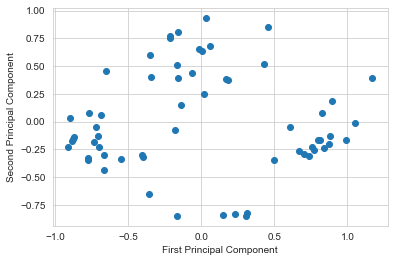

In [73]:
pca = PCA(n_components=8)
pca.fit(X_test)
reduced_data_test = pca.transform(X_test)
#inverse_data = pca.inverse_transform(reduced_data)
plt.scatter(reduced_data_test[:, 0], reduced_data_test[:, 1], label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [74]:
reduced_data_train = pd.DataFrame(reduced_data_train, columns=['Dim1', 'Dim2','Dim3','Dim4','Dim5','Dim6','Dim7','Dim8'])
reduced_data_test = pd.DataFrame(reduced_data_test, columns=['Dim1', 'Dim2','Dim3','Dim4','Dim5','Dim6','Dim7','Dim8'])
X_train=reduced_data_train
X_test=reduced_data_test

In [75]:
def plot_roc_(false_positive_rate,true_positive_rate,roc_auc):
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
def plot_feature_importances(gbm):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), gbm.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [76]:
combine_features_list=[
    ('Dim1','Dim2','Dim3'),
    ('Dim4','Dim5','Dim5','Dim6'),
    ('Dim7','Dim8','Dim1'),
    ('Dim4','Dim8','Dim5')
]

In [77]:
parameters=[
{
    'penalty':['l1','l2'],
    'C':[0.1,0.4,0.5],
    'random_state':[0]
    },
]

for features in combine_features_list:
    print(features)
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
    
    gslog=GridSearchCV(LogisticRegression(),parameters,scoring='accuracy')
    gslog.fit(X_train_set,y_train)
    print('Best parameters set:')
    print(gslog.best_params_)
    print()
    predictions=[
    (gslog.predict(X_train_set),y_train,'Train'),
    (gslog.predict(X_test_set),y_test,'Test'),
    ]
    
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1],pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)

    print("*"*50)    
    basari=cross_val_score(estimator=LogisticRegression(),X=X_train,y=y_train,cv=12)
    print(basari.mean())
    print(basari.std())
    print("*"*50) 

('Dim1', 'Dim2', 'Dim3')
**************************************************
Best parameters set:
{'C': 0.4, 'penalty': 'l2', 'random_state': 0}

Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.81      0.62      0.70       109
           1       0.74      0.88      0.80       133

    accuracy                           0.76       242
   macro avg       0.78      0.75      0.75       242
weighted avg       0.77      0.76      0.76       242

**************************************************
Train Confusion Matrix:
[[ 68  41]
 [ 16 117]]
**************************************************
Test Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.85      0.76      0.80        29
           1       0.80      0.88      0.84        32

    accuracy                           0.82        61
  

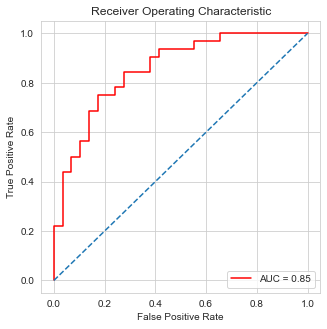

Accurancy Oranı : 0.7540983606557377
Logistic TRAIN score with  0.7933884297520661
Logistic TEST score with  0.7540983606557377

[[19 10]
 [ 5 27]]


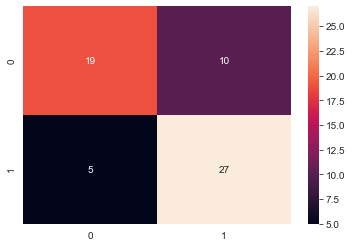

In [78]:
lr=LogisticRegression(C=0.1,penalty='l2',random_state=0)
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)


y_proba=lr.predict_proba(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)


from sklearn.metrics import r2_score,accuracy_score

#print('Hata Oranı :',r2_score(y_test,y_pred))
print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("Logistic TRAIN score with ",format(lr.score(X_train, y_train)))
print("Logistic TEST score with ",format(lr.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [79]:
parameters=[
{
    'n_neighbors':np.arange(2,33),
    'n_jobs':[2,6]
    },
]
print("*"*50)
for features in combine_features_list:
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
   
    gsknn=GridSearchCV(KNeighborsClassifier(),parameters,scoring='accuracy')
    gsknn.fit(X_train_set,y_train)
    print('Best parameters set:')
    print(gsknn.best_params_)
    print("*"*50)
    predictions = [
    (gsknn.predict(X_train_set), y_train, 'Train'),
    (gsknn.predict(X_test_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=KNeighborsClassifier(),X=X_train,y=y_train,cv=12)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
**************************************************
Best parameters set:
{'n_jobs': 2, 'n_neighbors': 30}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.77      0.72      0.75       109
           1       0.79      0.83      0.81       133

    accuracy                           0.78       242
   macro avg       0.78      0.78      0.78       242
weighted avg       0.78      0.78      0.78       242

**************************************************
Train Confusion Matrix:
[[ 79  30]
 [ 23 110]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.83      0.69      0.75        29
           1       0.76      0.88      0.81     

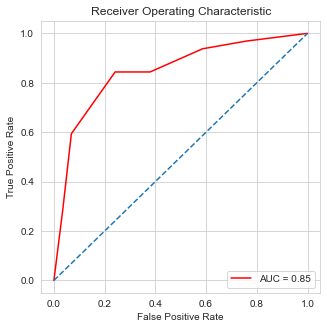

Accurancy Oranı : 0.7377049180327869
KNN TRAIN score with  0.8553719008264463
KNN TEST score with  0.7377049180327869

[[18 11]
 [ 5 27]]


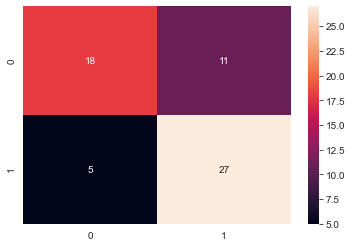

In [80]:
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

y_proba=knn.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("KNN TRAIN score with ",format(knn.score(X_train, y_train)))
print("KNN TEST score with ",format(knn.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

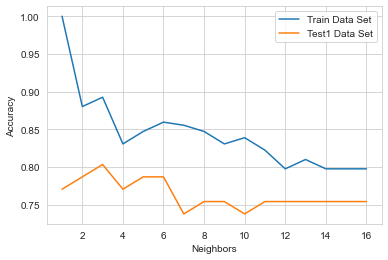

In [81]:
n_neighbors = range(1, 17)
train_data_accuracy = []
test1_data_accuracy = []
for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neigh,n_jobs=5)
    knn.fit(X_train, y_train)
    train_data_accuracy.append(knn.score(X_train, y_train))
    test1_data_accuracy.append(knn.score(X_test, y_test))
plt.plot(n_neighbors, train_data_accuracy, label="Train Data Set")
plt.plot(n_neighbors, test1_data_accuracy, label="Test1 Data Set")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.legend()
plt.show()

In [82]:
n_neighbors = range(1, 17)
k_scores=[]
for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neigh,n_jobs=5)
    scores=cross_val_score(estimator=knn,X=X_train,y=y_train,cv=12)
    k_scores.append(scores.mean())
print(k_scores)

[0.7444444444444444, 0.7484126984126983, 0.7855158730158731, 0.7732142857142855, 0.8063492063492065, 0.8142857142857142, 0.7894841269841271, 0.780952380952381, 0.7851190476190477, 0.7728174603174603, 0.7811507936507937, 0.7811507936507937, 0.785515873015873, 0.7730158730158729, 0.7938492063492064, 0.7813492063492063]


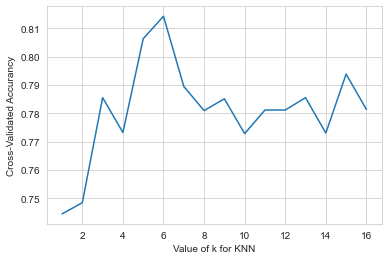

In [83]:
plt.plot(n_neighbors,k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel("Cross-Validated Accurancy")
plt.show()

In [84]:
knn=KNeighborsClassifier(n_jobs=2, n_neighbors=6)
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        26
           1       0.84      0.77      0.81        35

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [85]:
parameters = [
    {
        'kernel': ['linear'],
        'random_state': [2]
    },
    {
        'kernel': ['rbf'],
        'gamma':[0.9,0.06,0.3],
        'random_state': [0],
        'C':[1,2,3,4,5,6],
        'degree':[2],
        'probability':[True]
    },
]

for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
  
    svc = GridSearchCV(SVC(), parameters,
    scoring='accuracy')
    svc.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(svc.best_params_)
    print("*"*50)
    predictions = [
    (svc.predict(X_train_set), y_train, 'Train'),
    (svc.predict(X_test_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=SVC(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())

**************************************************
Best parameters set:
{'C': 5, 'degree': 2, 'gamma': 0.9, 'kernel': 'rbf', 'probability': True, 'random_state': 0}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       109
           1       0.80      0.81      0.81       133

    accuracy                           0.79       242
   macro avg       0.78      0.78      0.78       242
weighted avg       0.78      0.79      0.78       242

**************************************************
Train Confusion Matrix:
[[ 82  27]
 [ 25 108]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.73      0.66      0.69        29
           1       0.71      0.78      

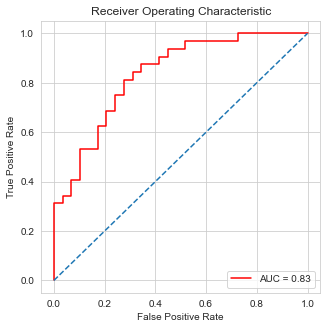

Accurancy Oranı : 0.7704918032786885
SVC TRAIN score with  0.8305785123966942
SVC TEST score with  0.7704918032786885

[[20  9]
 [ 5 27]]


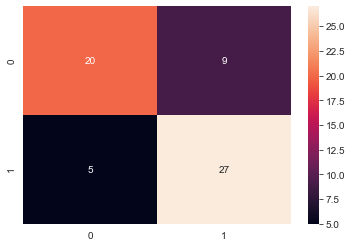

In [86]:
svc=SVC(C=5,degree=2,gamma=0.06,kernel='rbf',probability=True,random_state=0)
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

y_proba=svc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score

print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("SVC TRAIN score with ",format(svc.score(X_train, y_train)))
print("SVC TEST score with ",format(svc.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [87]:
parameters = [
{
    'learning_rate': [0.01, 0.02, 0.002],
    'random_state': [0],
    'n_estimators': np.arange(3, 20)
    },
]
for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
   
    gbc = GridSearchCV(GradientBoostingClassifier(), parameters, scoring='accuracy')
    gbc.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(gbc.best_params_)
    print("*"*50)
    predictions = [
    (gbc.predict(X_train_set), y_train, 'Train'),
    (gbc.predict(X_test1_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=GradientBoostingClassifier(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
Best parameters set:
{'learning_rate': 0.02, 'n_estimators': 10, 'random_state': 0}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.96      0.50      0.66       109
           1       0.71      0.98      0.82       133

    accuracy                           0.77       242
   macro avg       0.84      0.74      0.74       242
weighted avg       0.82      0.77      0.75       242

**************************************************
Train Confusion Matrix:
[[ 55  54]
 [  2 131]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.93      0.48      0.64        29
           1       0.67      0.97      0.79        32

    accuracy  

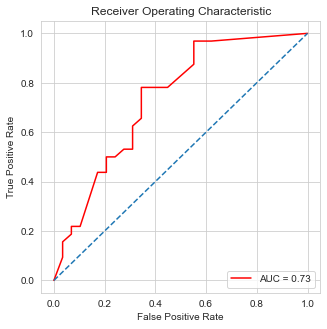

Accurancy Oranı : 0.6557377049180327
GradientBoostingClassifier TRAIN score with  0.8677685950413223
GradientBoostingClassifier TEST score with  0.6557377049180327

[[19 10]
 [11 21]]


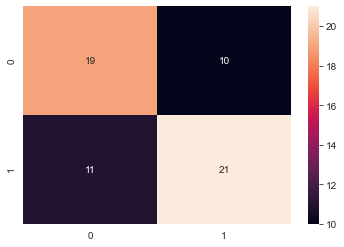

In [88]:
gbc=GradientBoostingClassifier(learning_rate=0.02,n_estimators=18,random_state=0)
gbc.fit(X_train,y_train)

y_pred=gbc.predict(X_test)

y_proba=gbc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score

print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("GradientBoostingClassifier TRAIN score with ",format(gbc.score(X_train, y_train)))
print("GradientBoostingClassifier TEST score with ",format(gbc.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

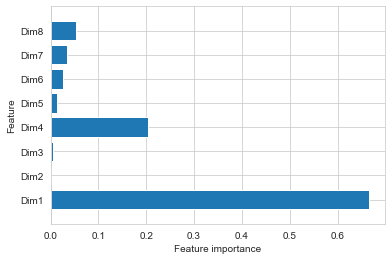

In [89]:
plot_feature_importances(gbc)
plt.show()


In [90]:
parameters = [
    {
        'max_depth': np.arange(1, 10),
        'min_samples_split': np.arange(2, 5),
        'random_state': [3],
        'n_estimators': np.arange(10, 20)
    },
]

for features in combine_features_list:
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
    
    tree=GridSearchCV(RandomForestClassifier(),parameters,scoring='accuracy')
    tree.fit(X_train_set, y_train)
    
    print('Best parameters set:')
    print(tree.best_params_)
    print("*"*50)
    predictions = [
        (tree.predict(X_train_set), y_train, 'Train'),
        (tree.predict(X_test1_set), y_test, 'Test1')
    ]
    
    for pred in predictions:
        
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
    
    print("*"*50)    
    basari=cross_val_score(estimator=RandomForestClassifier(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
Best parameters set:
{'max_depth': 8, 'min_samples_split': 4, 'n_estimators': 10, 'random_state': 3}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       109
           1       0.93      0.95      0.94       133

    accuracy                           0.93       242
   macro avg       0.93      0.93      0.93       242
weighted avg       0.93      0.93      0.93       242

**************************************************
Train Confusion Matrix:
[[100   9]
 [  7 126]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.82      0.62      0.71        29
           1       0.72      0.88      0.79        3

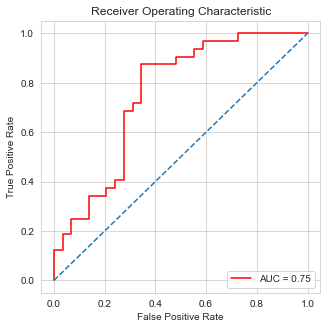

Accurancy Oranı : 0.7540983606557377
RandomForestClassifier TRAIN score with  0.9669421487603306
RandomForestClassifier TEST score with  0.7540983606557377

[[19 10]
 [ 5 27]]


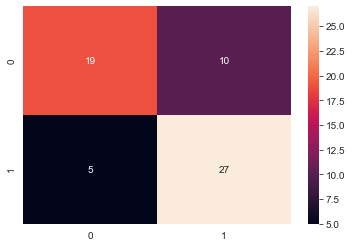

In [91]:
rfc=RandomForestClassifier(max_depth=7,min_samples_split=4,n_estimators=19,random_state=3)
rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

y_proba=rfc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score
print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("RandomForestClassifier TRAIN score with ",format(rfc.score(X_train, y_train)))
print("RandomForestClassifier TEST score with ",format(rfc.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [92]:
for i in [10,30,50,100]:
    rf = RandomForestClassifier(n_estimators=i, random_state = 3, max_depth=7)
    rf.fit(X_train, y_train)
    print("TEST set score with " +str(i)+" estimators: {:.5}".format(rf.score(X_test, y_test)))
    

TEST set score with 10 estimators: 0.57377
TEST set score with 30 estimators: 0.72131
TEST set score with 50 estimators: 0.7377
TEST set score with 100 estimators: 0.7377


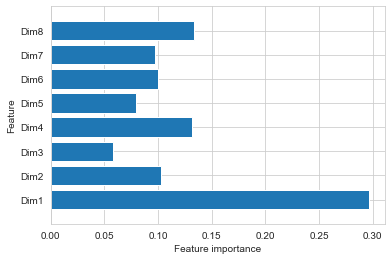

In [93]:
plot_feature_importances(rf)
plt.show()

In [94]:
parameters = [
{
    'random_state': [42],
    },
]
for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
    
    dtr = GridSearchCV(DecisionTreeClassifier(), parameters, scoring='accuracy')
    
    dtr.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(dtr.best_params_)
    print("*"*50)
    predictions = [
    (dtr.predict(X_train_set), y_train, 'Train'),
    (dtr.predict(X_test1_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=DecisionTreeClassifier(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)  

**************************************************
Best parameters set:
{'random_state': 42}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00       133

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

**************************************************
Train Confusion Matrix:
[[109   0]
 [  0 133]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.83      0.52      0.64        29
           1       0.67      0.91      0.77        32

    accuracy                           0.72        61
  

In [95]:
parameters = [
{
    'random_state': [42],
    },
]
for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
    
    dtr = GridSearchCV(SVC(), parameters, scoring='accuracy')
    
    dtr.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(dtr.best_params_)
    print("*"*50)
    predictions = [
    (dtr.predict(X_train_set), y_train, 'Train'),
    (dtr.predict(X_test1_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=SVC(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)  

**************************************************
Best parameters set:
{'random_state': 42}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       109
           1       0.78      0.82      0.80       133

    accuracy                           0.77       242
   macro avg       0.77      0.77      0.77       242
weighted avg       0.77      0.77      0.77       242

**************************************************
Train Confusion Matrix:
[[ 78  31]
 [ 24 109]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.74      0.69      0.71        29
           1       0.74      0.78      0.76        32

    accuracy                           0.74        61
  

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=10)


In [97]:
model = RandomForestClassifier(max_depth=5)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5)

In [98]:
estimator = model.estimators_[1]
feature_names = [i for i in x_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'

In [99]:
y_predict = model.predict(x_test)
y_pred_quant = model.predict_proba(x_test)[:, 1]
y_pred_bin = model.predict(x_test)

In [100]:
confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix

array([[27,  8],
       [ 4, 22]], dtype=int64)

In [101]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8709677419354839
Specificity :  0.7333333333333333


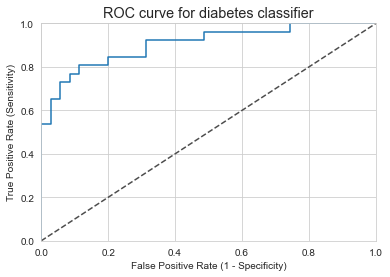

In [102]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

Another common metric is the Area Under the Curve, or AUC. This is a convenient way to capture the performance of a model in a single number, although it's not without certain issues. As a rule of thumb, an AUC can be classed as follows,

1. 0.90 - 1.00 = excellent
2. 0.80 - 0.90 = good
3. 0.70 - 0.80 = fair
4. 0.60 - 0.70 = poor
5. 0.50 - 0.60 = fail

Let's see what the above ROC gives us,

In [103]:
auc(fpr, tpr)


0.9054945054945055

# Conclusion
Now let's see what the model gives us from the ML explainability tools.

Permutation importance is the first tool for understanding a machine-learning model, and involves shuffling individual variables in the validation data (after a model has been fit), and seeing the effect on accuracy. Learn more here.

Let's take a look,

In [104]:
perm = PermutationImportance(model, random_state=1).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.0361 ± 0.0245,cp
0.0262 ± 0.0608,ca
0.0164 ± 0.0359,thal
0.0098 ± 0.0393,oldpeak
0.0098 ± 0.0161,restecg
0.0098 ± 0.0334,chol
0.0098 ± 0.0393,age
0.0066 ± 0.0262,sex
0.0000 ± 0.0207,slope
0 ± 0.0000,fbs


Cleary cp played a crucial role, gender didn't this might also be possible because of low volume of data. However, it is pretty clear from above which features contributed the most to our classifier